<a href="https://colab.research.google.com/github/dp1706/Machine-Learning/blob/master/Exam/End_Sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Question__

* Implements the linear regression using a Million Song Dataset from the UCI
Machine Learning Repository. Your goal is to train a linear regression model to predict the
release year of a song given a set of audio features.
  * a) Take a subset of data randomly from the dataset to create the linear regression model.
  * b) Next task is to extract a subset of features from the dataset using the PCA techniques.
Thereafter you can use those features into the regression model.

<br>

Stpes:
  * Downloading DataSet
  * Unzip
  * Module
  * Data Preprocessing
  * Model With DataSet
  * Implementing PCA

<h1></h1>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2020-11-17 03:35:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘YearPredictionMSD.txt.zip’

YearPredictionMSD.t 100%[===================>] 201.24M  54.8MB/s    in 4.0s    

2020-11-17 03:35:36 (50.2 MB/s) - ‘YearPredictionMSD.txt.zip’ saved [211011981/211011981]



In [ ]:
import os
import zipfile

local_zip = 'YearPredictionMSD.txt.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

<br>

## Module

<br>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix,plot_confusion_matrix,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

<br>

## DataSet

<br>

In [3]:
dataset = pd.read_csv('YearPredictionMSD.txt', sep=",", header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.6

<br>

In [4]:
dataset.shape

(515345, 91)

In [5]:
X = dataset.drop([0],axis=1)
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,28.68782,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035

<br>

In [6]:
Y = pd.DataFrame(dataset[0].values,columns=['year'])
Y.head()

,year
0,2001
1,2001
2,2001
3,2001
4,2001


<br>

In [7]:
print("Printing shape...")
print("Shape of X is : ",X.shape)
print("Shape of X is : ",Y.shape)

Printing shape...
Shape of X is :  (515345, 90)
Shape of X is :  (515345, 1)


<br>

* Preprocessing

<br>

In [8]:
sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X))
Xs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,1.080575,0.391265,1.826532,0.464657,-0.474730,-0.278204,-1.552371,-1.310845,0.387704,-0.666166,0.793414,-0.584275,-1.056103,-1.045093,-0.805912,-0.747368,-1.055262,-0.858844,-0.873144,-0.903356,-0.666024,-0.836212,-1.008012,-0.734829,-0.423683,-0.504619,0.261180,0.347007,-0.677763,-0.463919,-0.031910,0.144689,0.029940,0.103645,0.171685,-0.676680,-0.198144,-0.443721,0.585406,0.242786,...,-0.339481,-0.429076,0.007435,0.478516,0.050901,-0.310816,0.002206,0.241122,-0.074484,-0.115219,-0.195271,0.155139,-0.272267,0.138797,-0.366056,-0.279650,0.015447,0.371165,-0.035078,0.186311,-0.112104,-0.200706,0.115638,0.302385,0.200496,-0.012610,0.040941,-0.113944,0.251836,0.106465,-0.085335,0.108508,0.142775,-0.237355,0.049233,-0.356182,0.544458,-0.470599,-0.255977,0.042292
1,0.880919,0.332292,1.748539,0.721828,-0.164945,-1.191173,0.765681,0.109626,1.420941,0.414950,0.541252,-0.265139,0.479611,-0.218605,-1.079941,-0.967624,-0.281324,-0.803477,0.449577,-0.488505,-0.355738,-0.317769,-0.786935,0.165365,-0.193934,-0.151685,0.383939,0.744982,-0.681570,-0.974102,0.123618,0.304598,0.309095,-0.535819,1.049858,-0.424444,-0.605081,-0.352097,0.195786,0.870474,...,0.236999,-0.356714,0.831972,-0.544332,-0.559539,0.240032,-0.079926,-0.326565,-0.499388,-0.262564,-0.794017,-0.401863,0.346923,-0.874203,0.196257,0.092991,-0.916031,0.125195,0.137927,-0.797342,0.218263,0.548457,0.251739,0.125429,0.609536,-0.483539,-0.241197,-0.116109,0.409042,-0.692585,-0.314250,0.306236,-0.069483,0.052017,-0.632328,-0.436057,0.556448,0.568744,0.206940,1.158587
2,1.247622,0.592600,1.337173,0.750657,-0.001110,-0.702100,-0.060914,-0.069956,1.166254,-0.074608,0.659382,-0.206489,-1.179183,-0.994540,-0.754449,-0.842576,-1.167197,-0.644427,-0.680438,-0.744836,-1.315763,-0.990010,-0.774182,-0.603851,-0.389326,-0.475469,-0.187041,0.090331,-0.206321,-0.235303,-0.307898,-0.199418,-0.125792,0.578809,0.136693,-0.407285,-0.056498,-0.897922,0.090621,-0.048620,...,0.129665,-0.150860,0.164243,-0.146597,0.026313,-0.034123,0.289001,0.029936,-0.336572,0.194712,-0.099793,0.522931,0.059352,-0.402827,-1.048185,-0.021442,-0.153067,0.460456,-0.279680,-0.026845,0.765419,0.077703,-0.077183,0.873971,-0.154506,0.026094,-0.049322,-0.381945,0.103323,0.315248,-0.396186,0.566683,-0.756534,-0.284019,-0.024220,0.223128,-0.509789,-0.338457,0.105819,-0.090208
3,0.801044,-0.061805,0.783683,0.087218,0.329180,-1.298429,0.510714,-1.073355,-0.016803,-1.262655,1.550430,-0.708817,0.176411,-0.151642,-1.006990,-0.965945,-0.353561,-1.126500,-0.679815,-0.867950,-0.691843,-0.902406,-1.016593,-0.918716,0.292010,-0.147141,0.165074,-0.314855,-0.759269,-0.224530,0.094966,-0.662728,-0.656730,-0.736462,0.478642,-0.342991,-0.313003,-0.466669,0.381073,-0.112344,...,-0.019340,-0.874318,-0.123184,0.126595,0.782474,-0.887411,-0.071854,-0.076723,0.373259,0.056994,-0.417653,0.062135,-0.296027,0.615786,-0.224483,-0.221554,-0.863781,-0.299885,-0.507121,0.054858,-0.452187,0.636184,0.315799,0.839595,-0.239151,-0.878425,0.691674,-0.061946,0.478975,0.470511,0.586237,-0.559427,-0.478689,-0.890161,-0.793906,0.567269,-0.263107,0.408116,0.967862,0.793384
4,1.249775,0.793334,1.657037,0.447460,-0.406775,-0.567138,-0.692498,-0.952197,0.841844,-0.144910,0.401697,-0.042527,0.611278,-0.883220,-0.917862,-1.094474,-1.000481,-0.931815,-0.848601,-0.628978,-0.950142,-0.542465,-1.026901,-0.530277,-0.308223,-0.339436,0.461216,-0.226700,-0.494780,-0.381546,-0.174435,-0.388365,0.150394,-0.301324,0.862572,-0.569401,-0.175053,-0.912897,0.600699,0.027179,...,0.415545,-0.238135,0.215993,-0.226075,-0.369207,-0.514793,-0.204569,-0.518413,-0.547974,0.046413,-0.473956,-0.056385,-0.094789,0.265136,-0.152424,-0.041466,-0.509481,0.318540,-1.215231,-0.319524,0.255035,0.104808,0.499948,-0.316517,0.643128,-0.094951,-0.118654,-0.031379,0.470837,

<br>

In [9]:
x_train , x_test , y_train , y_test = train_test_split(Xs,Y,test_size=0.2,random_state=0)
print('shape of x_train is :',x_train.shape)
print('shape of x_test is :',x_test.shape)
print('shape of y_train is :',y_train.shape)
print('shape of y_test is :',y_test.shape)

shape of x_train is : (412276, 90)
shape of x_test is : (103069, 90)
shape of y_train is : (412276, 1)
shape of y_test is : (103069, 1)


<br>

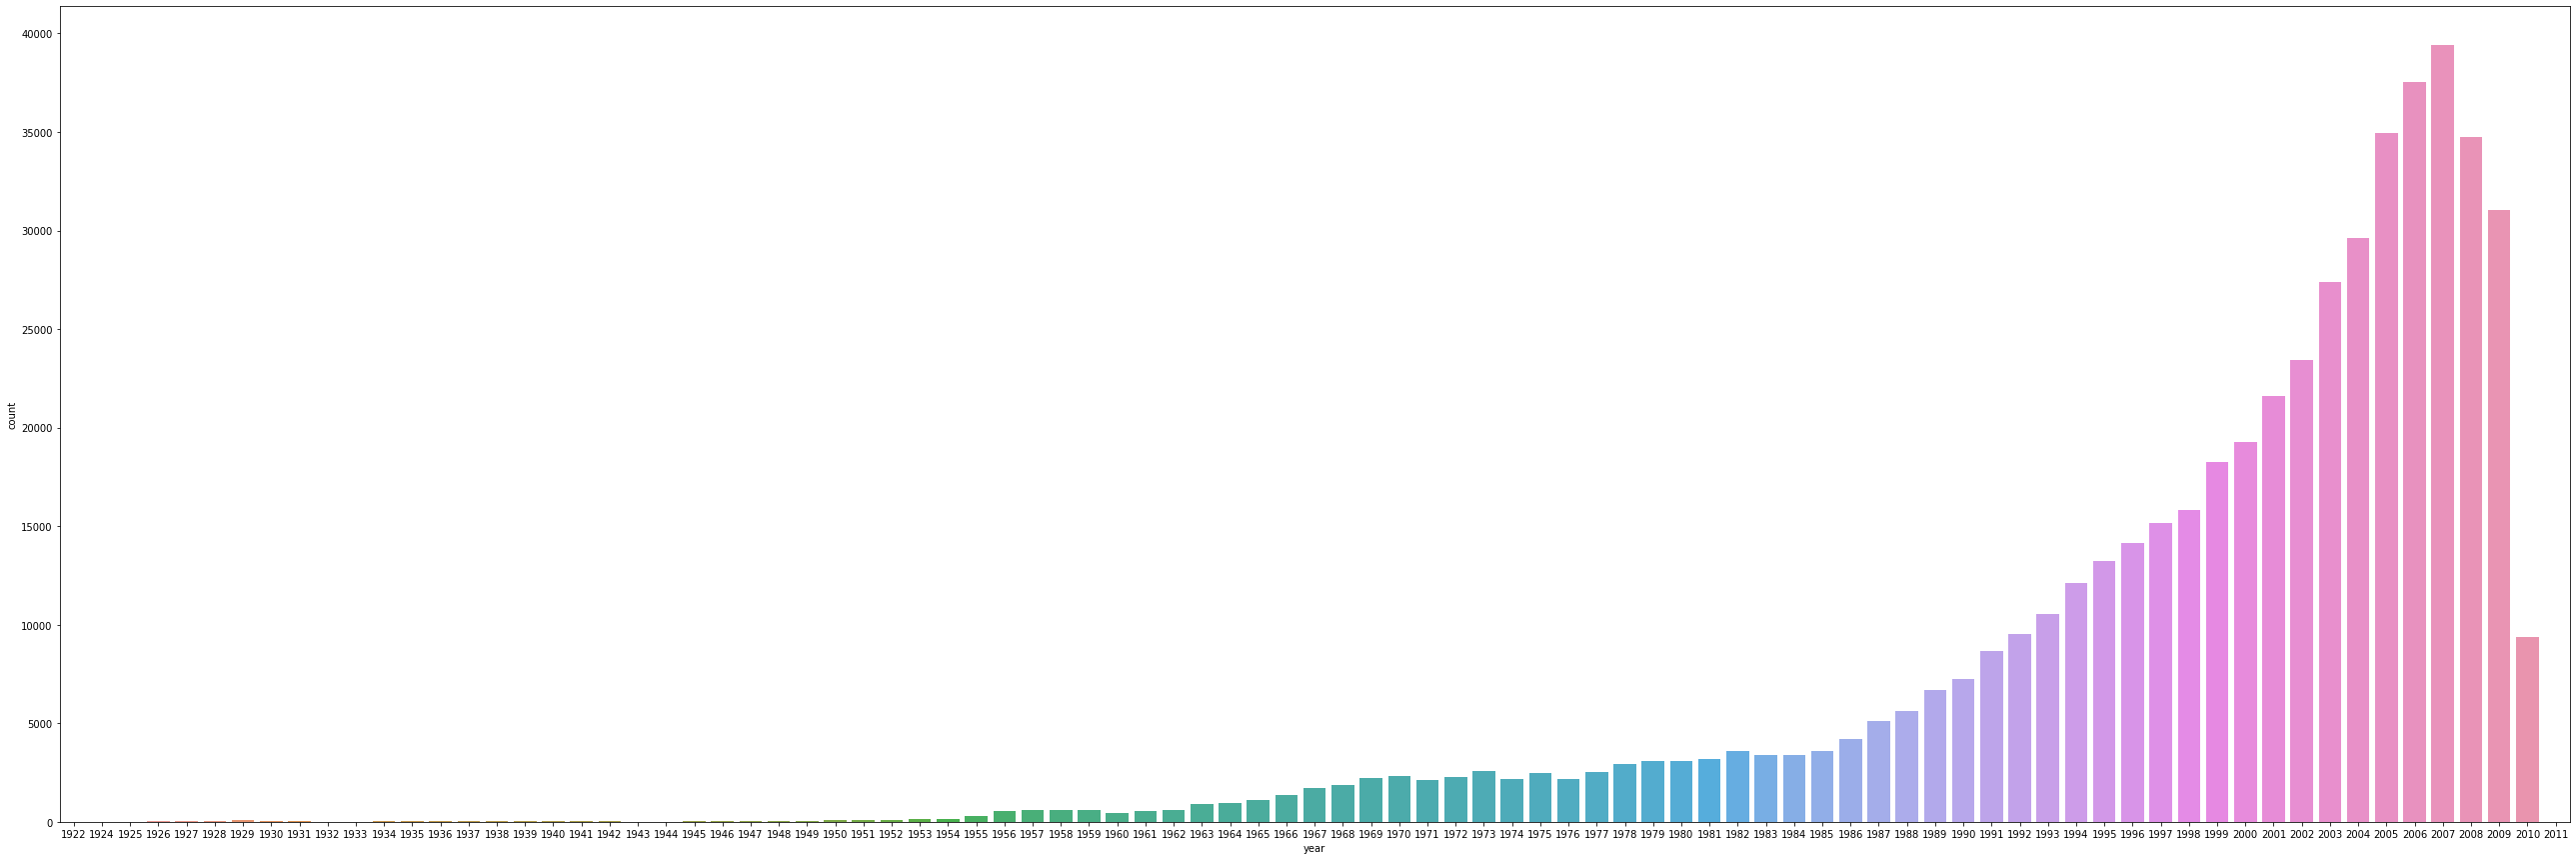

In [10]:
fig , axes = plt.subplots(1,1,figsize=(45,15))
sns.countplot(data=Y,x='year',ax=axes)
plt.show()

<br>

## Part 1: Model Using DataSet

<br>

In [11]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
coef = model.coef_
print('Coeficient of the model is : ',coef)

Coeficient of the model is :  [[ 5.30226049e+00 -2.93225308e+00 -1.54244541e+00  5.55252596e-02
  -3.43812105e-01 -2.81848629e+00 -8.54192696e-02 -8.19177082e-01
  -7.67295483e-01  1.83447503e-01 -7.16295489e-01 -1.77692828e-02
   1.04083505e+00  6.36588902e-01 -5.13467631e-01  6.34234563e-01
   2.19002390e-01  8.57511589e-01  5.88256003e-01  6.56513792e-01
   1.72276548e-01 -5.78872066e-02  1.35009098e+00  4.33357904e-01
  -4.35011430e-01  5.22856165e-02  8.57947536e-01  1.09185957e-01
   1.61614611e-01 -2.34531299e-02 -1.33723284e-01 -9.39460805e-02
  -3.88020490e-01  1.45873117e-01  5.93770941e-02 -5.69367588e-01
  -1.19860038e-01  3.04783431e-01  3.51198479e-01 -3.67476113e-01
  -2.35481999e-01 -7.11665417e-02 -1.05844888e-01 -7.16242907e-02
  -1.36177480e-01  3.97944709e-01  2.00324525e-01 -5.34026052e-01
   6.12878090e-02  2.35264105e-01  3.15110184e-02 -9.63647931e-02
   1.47448791e-01  3.13597536e-02 -4.84673186e-03  2.81537454e-02
  -5.72693537e-01  5.23926232e-01 -2.23577057e

In [13]:
intercept = model.intercept_
print("intercept of model is : ",intercept)

intercept of model is :  [1998.4088371]


<br>

In [15]:
Y_pred = model.predict(x_test)
print('MAE:', mean_absolute_error(y_test, Y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, Y_pred)))

MAE: 6.8085435900922615
RMSE: 9.605586104061842


<br>

## Part 2: Implementing PCA

<br>

In [17]:
from sklearn.decomposition import PCA

<br>

* To find the best Number Of Features I used Variance should be > 0.99 so that we can get best Number of Feature

<br>

In [18]:
PCA_model = PCA(n_components=0.99)

p_component = PCA_model.fit_transform(Xs)
p_component[:1]

array([[-3.25285865e+00, -5.18684965e-01,  8.53050679e-01,
         7.55028577e-02, -4.77752661e-01, -4.04627595e-01,
        -5.29314402e-01,  5.10263670e-01, -8.45877605e-01,
         1.18532265e+00, -1.08694539e+00,  9.32060381e-01,
         1.91767044e-01, -2.33811830e-01, -4.87823814e-01,
         5.02976149e-02,  3.53406124e-01,  2.30467896e-02,
         1.00546507e+00,  1.84837044e-01, -5.57946524e-02,
         8.20043828e-02,  9.62489651e-01,  7.03382578e-01,
        -3.43842643e-01,  2.04183977e-01, -2.56408532e-01,
         8.91589121e-02, -6.34324484e-01,  5.17450525e-01,
        -2.62518430e-01, -4.65542650e-01, -4.49798316e-01,
        -4.54712385e-01, -1.00809433e+00, -3.80616354e-01,
         3.15863177e-01,  3.16474930e-01,  1.91899717e-02,
         4.39069199e-01,  1.19459883e-01,  5.66970099e-01,
        -3.91079124e-01, -3.05815862e-01,  2.55045349e-01,
        -3.64736904e-01,  2.44369437e-01, -6.88701226e-01,
        -2.10216308e-01, -8.30024375e-02,  2.26958199e-0

In [19]:
PCA_model.explained_variance_ratio_

array([0.11503973, 0.07790158, 0.05907474, 0.0419945 , 0.03749965,
       0.02778214, 0.02359694, 0.02306341, 0.02095626, 0.02014271,
       0.01917197, 0.01859606, 0.0179203 , 0.01692379, 0.01625507,
       0.01587333, 0.01517201, 0.01414747, 0.01403596, 0.01349587,
       0.01311377, 0.0126036 , 0.01236133, 0.0118165 , 0.01152131,
       0.01146037, 0.01108205, 0.01096459, 0.01046339, 0.01007216,
       0.00980048, 0.00942926, 0.00928651, 0.0089574 , 0.00841388,
       0.00820478, 0.00805824, 0.00801004, 0.00766173, 0.00749449,
       0.00732937, 0.00718566, 0.00698373, 0.00681668, 0.0066111 ,
       0.00634036, 0.00627471, 0.00616439, 0.00599105, 0.00584647,
       0.00568969, 0.00550843, 0.00535633, 0.00516322, 0.00502034,
       0.00499435, 0.0048546 , 0.00473606, 0.00461923, 0.00438083,
       0.00424832, 0.00411072, 0.00398527, 0.00393766, 0.00372408,
       0.0036495 , 0.00351366, 0.0033772 , 0.00325816, 0.00317077,
       0.00304441, 0.00292653, 0.00275512, 0.00273397, 0.00262

<br>

In [20]:
New_X = pd.DataFrame(p_component)
New_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,-3.252859,-0.518685,0.853051,0.075503,-0.477753,-0.404628,-0.529314,0.510264,-0.845878,1.185323,-1.086945,0.932060,0.191767,-0.233812,-0.487824,0.050298,0.353406,0.023047,1.005465,0.184837,-0.055795,0.082004,0.962490,0.703383,-0.343843,0.204184,-0.256409,0.089159,-0.634324,0.517451,-0.262518,-0.465543,-0.449798,-0.454712,-1.008094,-0.380616,0.315863,0.316475,0.019190,0.439069,...,-0.391079,-0.305816,0.255045,-0.364737,0.244369,-0.688701,-0.210216,-0.083002,0.226958,-0.018934,-0.271980,0.290367,-0.108365,-0.546954,-0.366144,0.558478,0.293312,-0.244000,0.109928,0.487305,0.008508,-0.034983,-0.001479,-0.015620,0.018641,-0.026130,-0.006585,0.117789,-0.035424,0.491669,0.218005,0.028476,0.307158,0.116471,-0.158118,0.219089,0.148068,-0.008781,0.332986,-0.027924
1,-2.766633,0.973212,-0.128405,0.972944,0.068079,-0.076138,-0.792976,0.428443,0.642371,-0.997196,-0.025898,1.324400,-0.390458,-0.686713,-1.353806,0.382611,-0.334043,0.532162,0.180354,1.003015,0.393434,-0.878050,-0.170700,0.569929,0.550311,0.504231,-0.413685,2.080132,0.183523,-0.598096,0.831863,-1.201857,0.643701,0.124792,-0.497191,0.584490,0.791086,0.255938,-0.320488,0.397076,...,0.785014,-0.125177,0.333684,0.037934,0.355235,-0.161124,0.090093,-0.106306,0.086821,-0.215064,-0.621248,-0.266628,-0.234079,-0.164091,0.051287,0.095805,0.176372,0.354496,0.113958,0.182910,0.197991,0.543836,-0.324649,0.113991,0.132789,-0.265283,0.535387,-0.148968,-0.035598,-0.141148,0.114947,0.635337,-0.743846,0.202401,0.057248,-0.364738,0.265344,-0.457000,0.302712,0.134154
2,-3.013242,-1.536162,0.611716,0.850193,-0.682921,-0.763428,0.454455,0.253517,-0.773298,0.558001,-0.104120,0.295994,0.703416,0.707118,-0.648108,0.293122,-0.151473,0.037099,0.698212,0.632803,0.289390,-0.768608,0.672787,0.640815,0.090238,-0.170061,0.024795,0.357098,-0.393087,0.605989,-0.147738,-0.544692,0.467003,0.375835,-0.832186,0.020520,-0.038701,0.188011,-0.019909,0.217915,...,0.688413,-0.292132,0.552980,-0.372654,0.273903,-0.136460,-0.161890,0.098782,-0.060503,0.528487,-0.311160,-0.111907,0.538633,-0.329620,-0.214605,0.141065,0.348085,0.344193,0.072936,0.380794,0.335285,-0.085495,-0.161431,0.282382,0.365327,-0.134543,-0.102187,0.164334,-0.133227,-0.178440,0.013555,-0.219266,0.124775,0.240336,0.057383,0.322093,0.232893,0.024731,-0.029153,0.235159
3,-3.316928,0.318599,-1.138162,0.460568,-1.349070,0.538686,0.197094,-0.198585,0.374469,0.845197,-0.896323,0.494972,0.068613,-1.439213,0.065793,0.269917,-1.568167,0.012256,0.047070,-0.677712,0.762745,-0.607486,0.528959,1.021134,-0.633641,-1.267247,0.353664,-0.368298,0.281886,0.667381,0.413255,-0.701366,0.786589,0.031560,-0.599388,-0.930657,-0.281141,-0.478798,0.086771,0.217310,...,-0.325264,-0.195300,0.103808,0.241858,-0.972748,-0.793697,0.470411,-0.379757,-0.145184,0.682497,0.413864,-0.212944,-0.095588,-0.149289,-0.348415,0.032943,0.014604,-0.098708,0.319471,-0.021907,0.141569,-0.102544,-0.636824,0.156995,0.153008,0.003174,0.055383,0.025420,0.144569,0.345915,0.556061,0.408490,-0.158537,0.281434,0.867971,0.077442,0.558765,-0.219660,-0.228250,0.046158
4,-3.603850,-0.007980,0.126181,0.845649,-1.359200,-0.071412,-0.581464,-0.130256,0.747299,0.048775,-0.680452,0.996709,-0.350725,-0.552726,-0.600492,-0.860368,0.383567,-0.108504,0.382673,0.635468,0.135622,0.169220,0.354672,0.989883,-0.280109,0.232252,-0.069440,0.524153,-0.055893,-0.171759,0.202064,-1.168952,0.272687,-0.218587,-0.787439,-0.610341,-0.289971,0.327600,-0.293775,0.186096,...,0.274673,-0.038841,0.542909,-0.692802,0.149840,-0.326944,-0.112316,0.223837,-0.468310,-0.162032,-0.117777,0.447335,-0.189905,-0.191169,0.254037,0.540256,-0.300423,0.063647,-0.438135,0.102561,-0.407459,-0.132718,-0.019519,0.025601,0.168370,-0.217534,0.033244,0.182575,0.055250,-0.027207,-0.084335,0.476127,0.039749,0.483553,0.122371,0

<br>

In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(New_X,Y,test_size=0.2,random_state=0)
print('shape of x_train is :',X_train.shape)
print('shape of x_test is :',X_test.shape)
print('shape of y_train is :',Y_train.shape)
print('shape of y_test is :',Y_test.shape)

shape of x_train is : (412276, 82)
shape of x_test is : (103069, 82)
shape of y_train is : (412276, 1)
shape of y_test is : (103069, 1)


<br>

In [22]:
pca_reg = LinearRegression()
pca_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
pca_coef = pca_reg.coef_
pca_intercept = pca_reg.intercept_
print("intercept of pca_model is : ",pca_intercept)
print('Coeficient of the pca_model is : ',pca_coef)

intercept of pca_model is :  [1998.40918642]
Coeficient of the pca_model is :  [[-0.08299957 -0.47102163 -0.60828996  0.40254784  0.16182745  0.78636687
  -0.15837775  0.72056975  0.14110173  0.28605419  0.3065763  -0.81820503
  -0.9645977  -0.59136819  0.51368635  0.02773651 -0.04220422  0.72799551
  -0.35196015  0.59163222  0.6732353   0.61039301  0.22396341 -0.29604717
   0.50047097  0.17271386  0.58550739  0.39079308  0.18356272 -0.2388327
  -0.04025618  1.07798575 -0.15024262 -0.47962406 -0.19719871 -0.12344799
  -0.28751746  0.04611224  0.26125898 -0.01260105  0.56752493  0.25853993
   0.32275774  0.23467612 -0.19906163  0.34187909  0.07283164 -0.06102259
   0.07628915 -0.07535533 -0.01907543  0.34955865 -0.60029851 -0.3492669
   1.10280163 -0.51271645 -0.60550901  0.43686874 -0.0377371  -0.65015613
   0.73277611 -0.7892217   0.16155231 -1.51388409 -1.8193662  -1.77835185
   1.8537137  -0.13792455 -0.29738279  0.51196598 -0.79584735 -0.0921373
  -0.82396486  3.63663144 -1.0816618

<br>

In [24]:
PCA_pred = pca_reg.predict(X_test)
print('MAE:', mean_absolute_error(Y_test, PCA_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, PCA_pred)))

MAE: 6.8607469953194045
RMSE: 9.660908485551415
